# Prédiction Prophet

## Imports et lecture des données

### Imports

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from prophet import Prophet
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
)

from src.utils import init_notebook

In [ ]:
init_notebook()

In [ ]:
prediction_results_dict = {}

### Lecture des données

In [ ]:
data_folder = "data/raw_data"

In [ ]:
stock_name = "AAPL"

In [ ]:
df = pd.read_csv(
    f"{data_folder}/{stock_name}.csv", parse_dates=["Date"], index_col="Date"
)

### Pré-traitement pour Prophet

In [ ]:
train_start_date = "2019"
train_end_date = "2021-10-01"
df_train = df.loc[train_start_date:train_end_date]

In [ ]:
df_train.shape

(694, 6)

In [ ]:
x = df_train[[]].copy()

In [ ]:
x["ds"] = df_train.index
x["y"] = df_train[["Close"]]

In [ ]:
x.head()

,ds,y
Date,,
2019-01-02,2019-01-02,39.480000
2019-01-03,2019-01-03,35.547501
2019-01-04,2019-01-04,37.064999
2019-01-07,2019-01-07,36.982498
2019-01-08,2019-01-08,37.687500


In [ ]:
model = Prophet()
model.fit(x)

23:42:47 - cmdstanpy - INFO - Chain [1] start processing
23:42:47 - cmdstanpy - INFO - Chain [1] done processing


<prophet.forecaster.Prophet>

In [ ]:
future = model.make_future_dataframe(periods=62)
future.tail()

,ds
751,2021-11-28
752,2021-11-29
753,2021-11-30
754,2021-12-01
755,2021-12-02


In [ ]:
forecast = model.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
751,2021-11-28,162.895645,158.155484,167.803820
752,2021-11-29,155.053766,150.044895,160.447801
753,2021-11-30,155.172747,150.417699,160.746224
754,2021-12-01,155.375946,150.702424,161.021146
755,2021-12-02,155.324346,150.276016,160.726653


C:\Users\AB2-PC\AppData\Local\pypoetry\Cache\virtualenvs\stock-analysis-59_ARg3a-py3.10\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\AB2-PC\AppData\Local\pypoetry\Cache\virtualenvs\stock-analysis-59_ARg3a-py3.10\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


<matplotlib.legend.Legend>

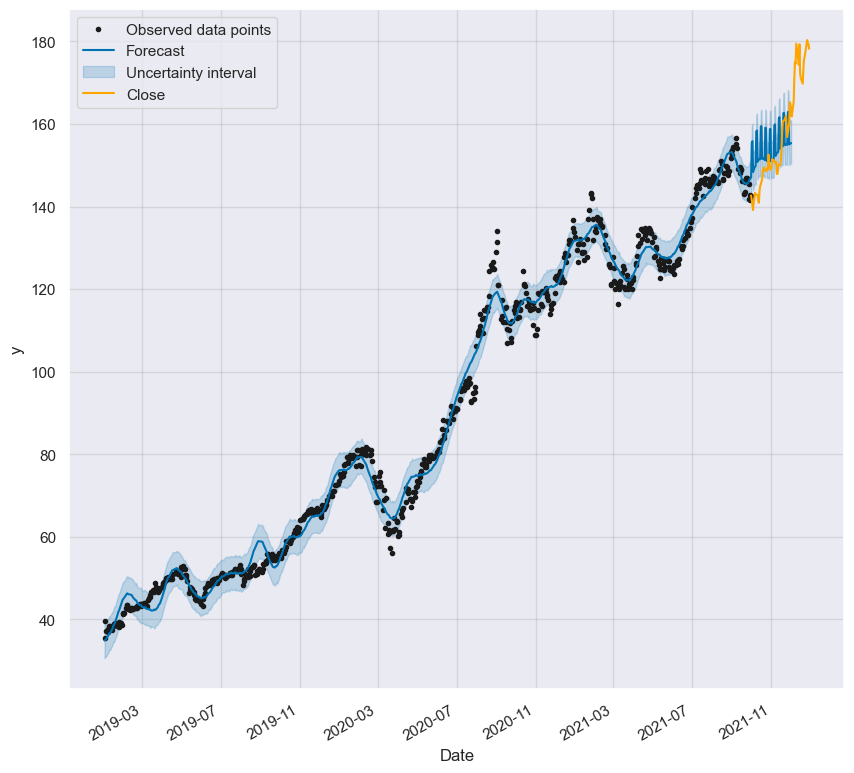

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 10))
fig1 = model.plot(forecast, ax=ax1)
df[["Close"]].loc[train_end_date:].plot(ax=ax1, color="orange")
plt.legend()

C:\Users\AB2-PC\AppData\Local\pypoetry\Cache\virtualenvs\stock-analysis-59_ARg3a-py3.10\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\AB2-PC\AppData\Local\pypoetry\Cache\virtualenvs\stock-analysis-59_ARg3a-py3.10\lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\AB2-PC\AppData\Local\pypoetry\Cache\virtualenvs\stock-analysis-59_ARg3a-py3.10\lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of

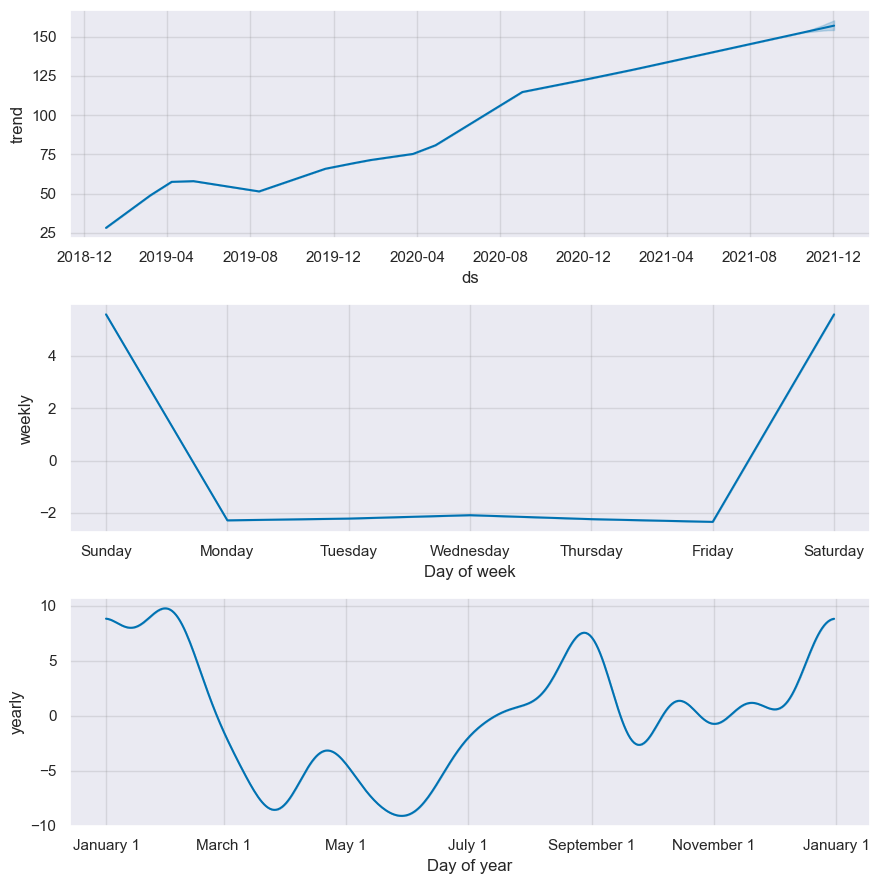

In [ ]:
fig2 = model.plot_components(forecast)

In [ ]:
forecast.index = df.index

In [ ]:
y_true = df[["Close"]].loc[train_end_date:]
y_pred = forecast[["yhat"]].iloc[-y_true.shape[0] :]

In [ ]:
rmse = mean_squared_error(y_true, y_pred, squared=False)
mae = mean_absolute_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}%")

RMSE: 11.965935077902962
MAE: 9.370173438133252
MAPE: 0.05752552153894722%


In [ ]:
prediction_results_dict["Prophet"] = [rmse, mae, mape]

In [ ]:
prediction_results_df = pd.DataFrame(prediction_results_dict).T
prediction_results_df.columns = ["RMSE", "MAE", "MAPE"]
prediction_results_df

,RMSE,MAE,MAPE
Prophet,11.965935,9.370173,0.057526


In [ ]:
print(prediction_results_df.to_markdown())

|         |    RMSE |     MAE |      MAPE |
|:--------|--------:|--------:|----------:|
| Prophet | 11.9659 | 9.37017 | 0.0575255 |
